In [2]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))  
from tools.dictionary import *

import pandas as pd
db1 = pd.read_feather('data/financial_reports_upto_2023-10-06_part1.feather')

# code_list = db1['code'].unique().tolist()+db2['code'].unique().tolist()+db3['code'].unique().tolist()


In [3]:
code = '005930'
record = db1.loc[db1['code']==code]

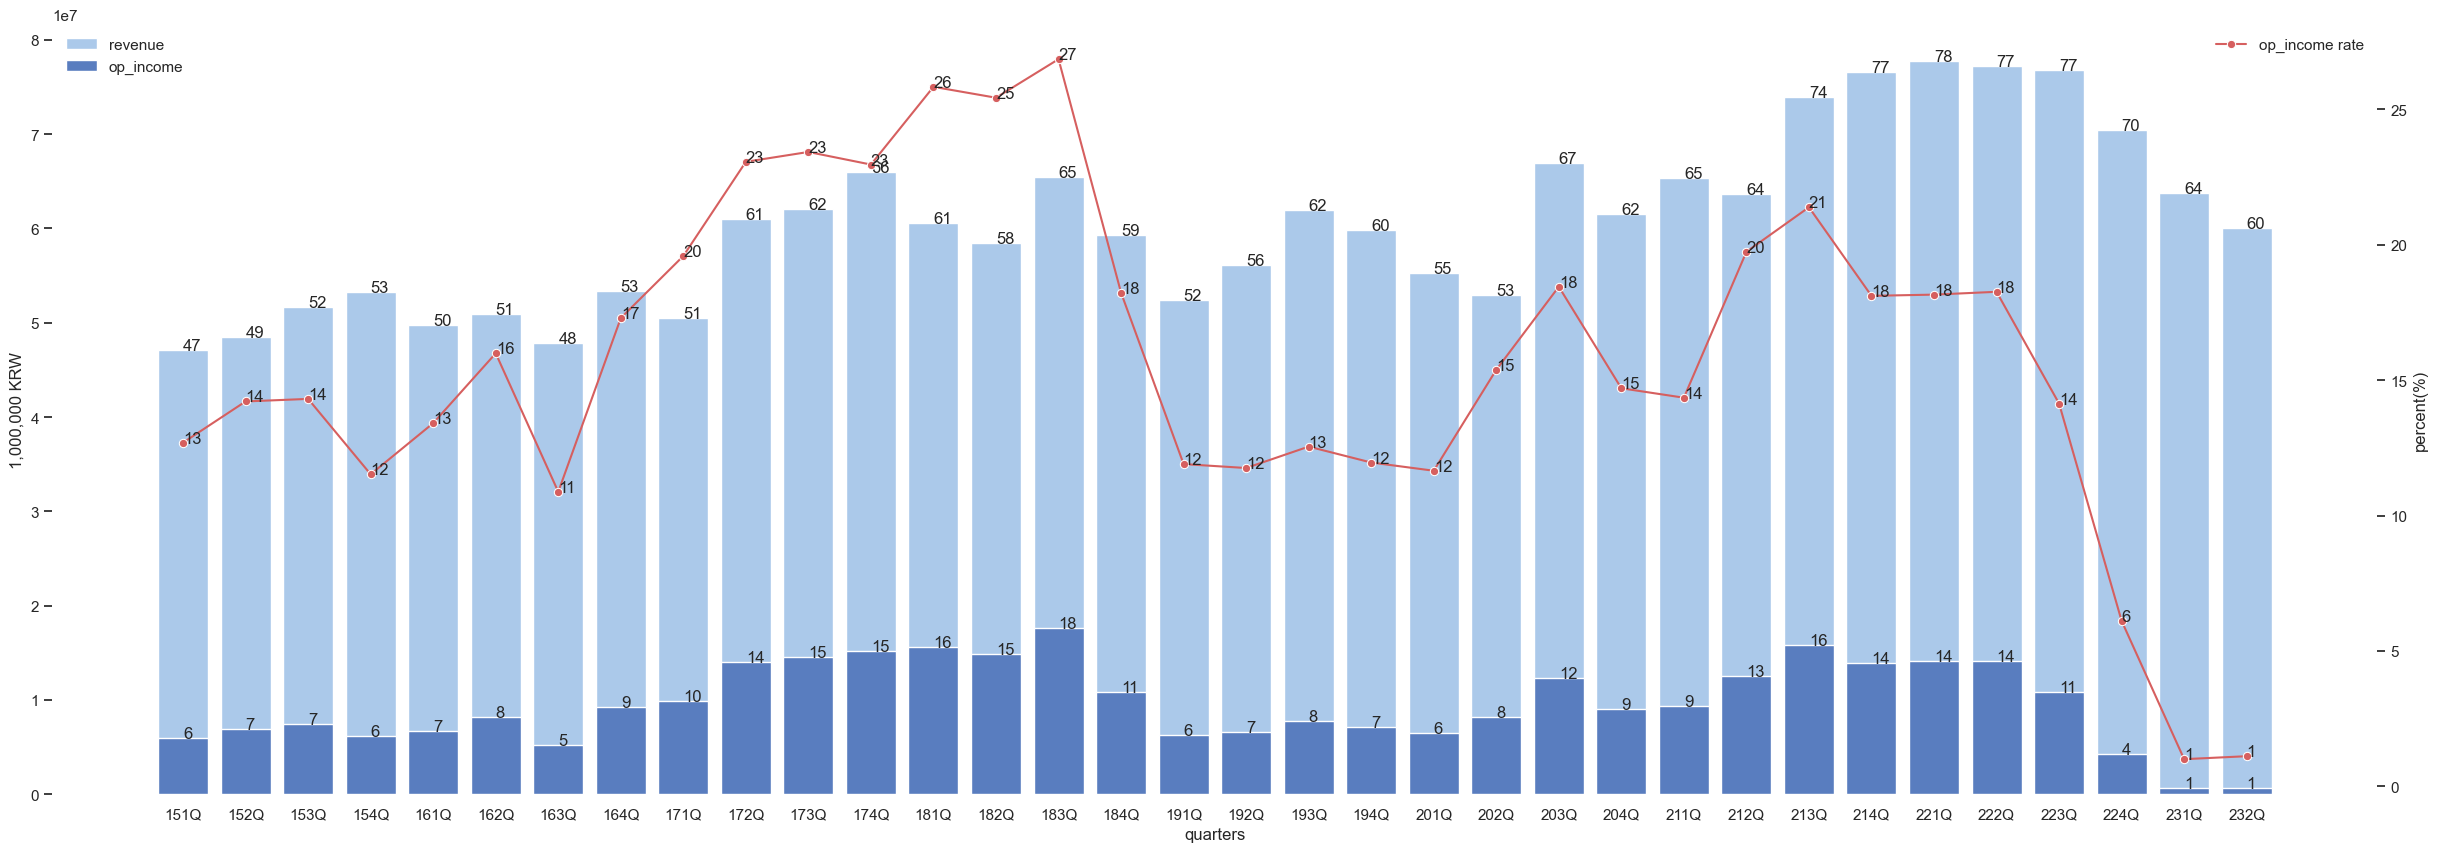

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

y1 = db1.loc[(db1['code']==code) & (db1['fs_div']=='CFS') & (db1['account']=='revenue')]
y2 = db1.loc[(db1['code']==code) & (db1['fs_div']=='CFS') & (db1['account']=='operating_income')] 
# y3 = y2.div(y1.values)
y_ = y1.isnull()*y2.isnull().values
quarter_cols= [s for s in record.columns.values if (not y_[s].values[0]) and ('Q' in s)]

y1 = y1[quarter_cols].values[0]/KRW_UNIT
y2 = y2[quarter_cols].values[0]/KRW_UNIT
y3 = y2/y1*100
x = [s.replace('2020','XX').replace('20','').replace('XX','20').replace('_','') for s in quarter_cols]

sns.set_theme(style="white")
f, ax = plt.subplots(1, 1, figsize=(30, 10))
ax = [ax]
# f, ax = plt.subplots(2, 1, figsize=(30, 10), constrained_layout=True, gridspec_kw={'height_ratios': [5, 1]})
axr = ax[0].twinx()
sns.set_color_codes("pastel")
sns.barplot(x=x, y=y1, ax = ax[0], label="revenue", color="b")
for index, value in enumerate(y1):
    ax[0].text(index, value, str(round(value/10**6)))
sns.set_color_codes("muted")
sns.barplot(x=x, y=y2, ax = ax[0], label="op_income", color="b")
for index, value in enumerate(y2):
    ax[0].text(index, value, str(round(value/10**6)))
ax[0].legend(ncol=1, loc="upper left", frameon=False)
ax[0].set(ylabel="1,000,000 KRW", xlabel="quarters")
sns.lineplot(x=x, y=y3, ax = axr, label="op_income rate", color="r", marker='o')
for index, value in enumerate(y3):
    axr.text(index, value, str(round(value)))
axr.legend(ncol=1, loc="upper right", frameon=False)
axr.set(ylabel="percent(%)")
# ax.set(xlim=(0,len(x)), ylim=(0,max(y1)*1.1))
sns.despine(left=True, bottom=True)

# y4 = pd.DataFrame(y3).T.astype(float)
# y4 = pd.concat([y4,y4/2], axis=0)
# y4.columns = x
# y4.index = ['aaa', 'bbbb']
# sns.heatmap(data=y4, annot=True, linewidths=.5, ax=ax[1])
# plt.title('rev, op_income plots for code '+str(code))
# print(ax[0].containers[0].patches[0])



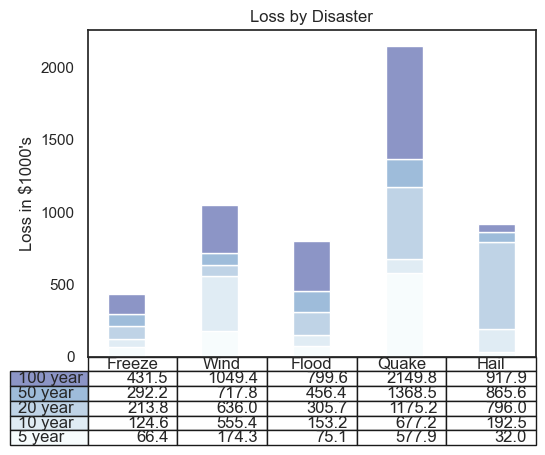

In [96]:
kimport matplotlib.pyplot as plt
import numpy as np

data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel(f"Loss in ${value_increment}'s")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

,code,fs_div,sj_div,account_nm,account,2015_1Q,2015_2Q,2015_3Q,2015_4Q,2016_1Q,...,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020,FY2021,FY2022
9,005930,CFS,IS,매출액,revenue,47117918000000,48537539000000,51682572000000,53315453000000,49782252000000,...,228692667000000,206205987000000,200653482000000,201866745000000,239575376000000,243771415000000,230400881000000,236806988000000,279604799000000,302231360000000


ValueError: could not convert string to float: 'CFS'

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<Axes: xlabel='year', ylabel='month'>

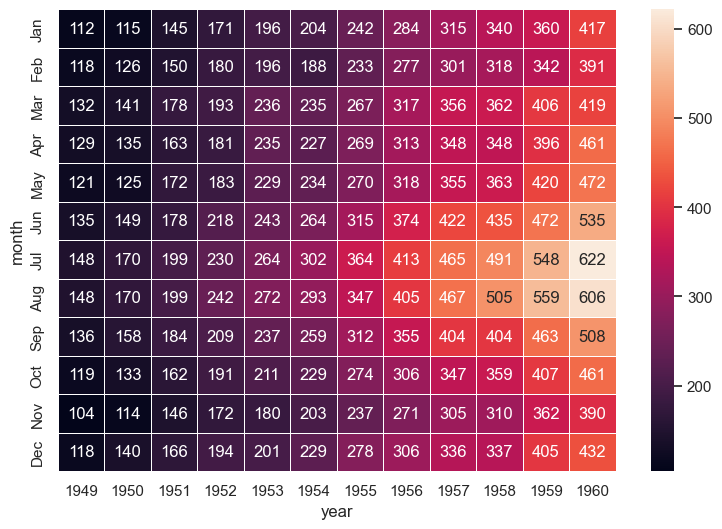

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
display(flights_long)
flights = (
    flights_long
    .pivot(index="month", columns="year", values="passengers")
)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

c:\Users\user\projects\trader\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


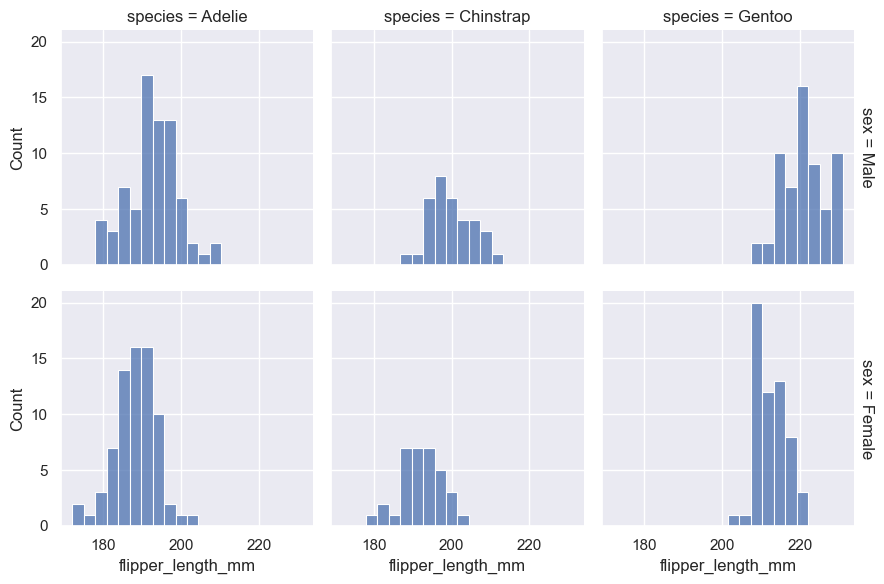

In [12]:
import seaborn as sns

sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

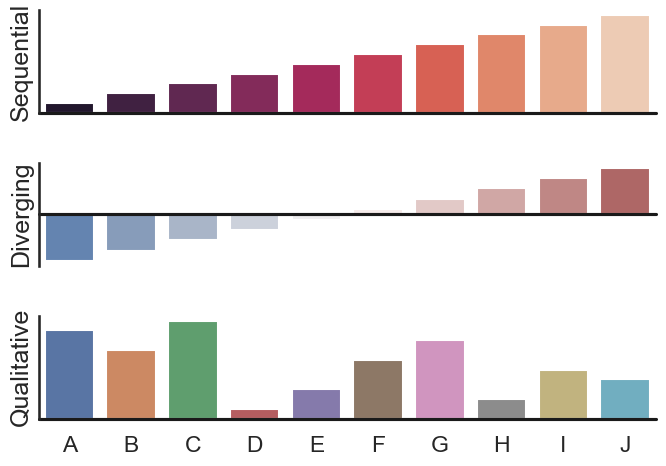

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, hue=x, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, hue=x, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, hue=x, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

c:\Users\user\projects\trader\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


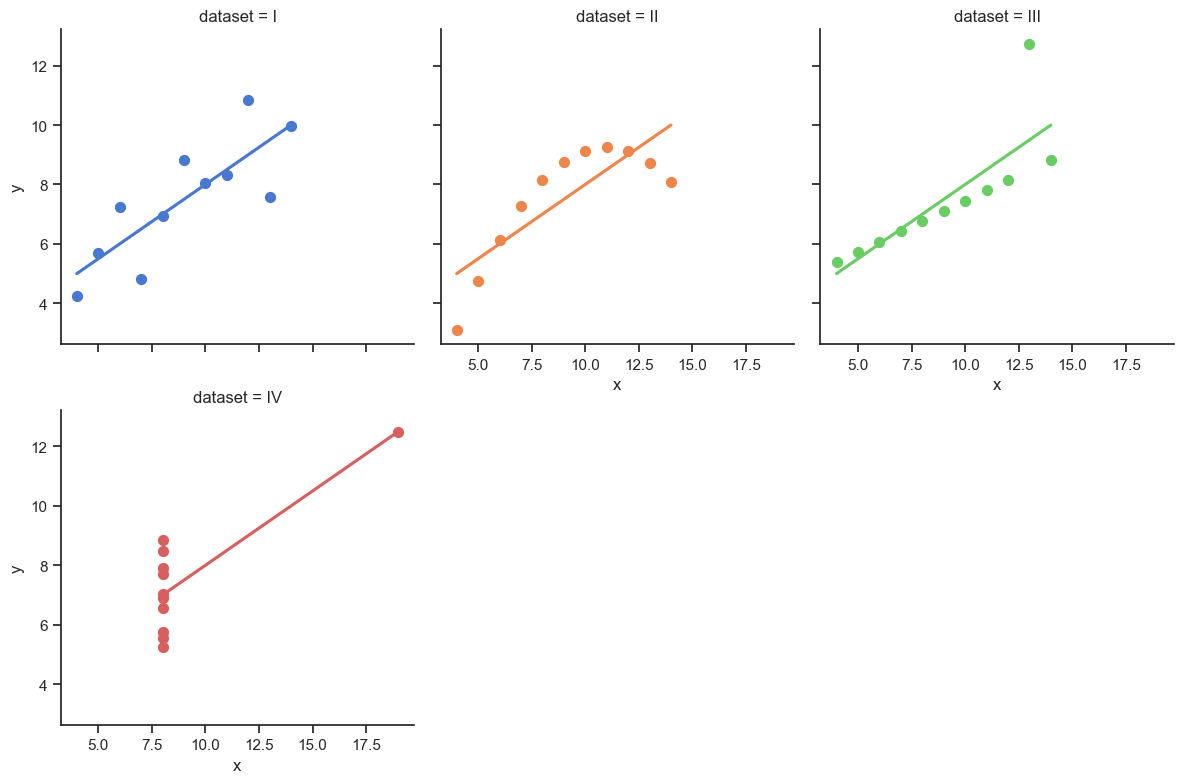

In [3]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=3, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)
display(df)